# Data Visualization on the Housing Dataset:
_Practicing data visualization techniques on a housing dataset._

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [91]:
house=pd.read_csv('housing.csv')

In [92]:
house.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [93]:
categorical_columns=set(house.columns)-{'price','area'}

for col in categorical_columns:
    house[col]=house[col].astype('category')
    

house.dtypes

price                  int64
area                   int64
bedrooms            category
bathrooms           category
stories             category
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking             category
prefarea            category
furnishingstatus    category
dtype: object

In [94]:
house.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [95]:
house['price'].min()
house['price']=house['price']/1000000

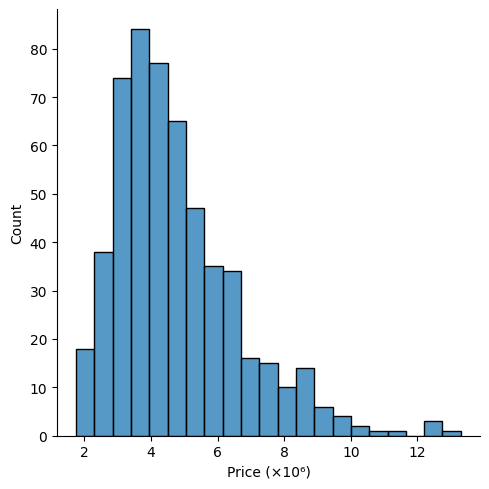

In [96]:
pr=sns.displot(
    data=house,
    x='price'
)
pr.set(
    xlabel='Price (×10⁶)'
)
pr

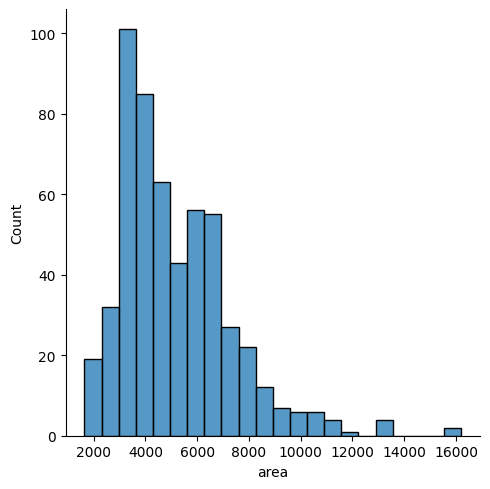

In [97]:
sns.displot(
    data=house,
    x='area'
)

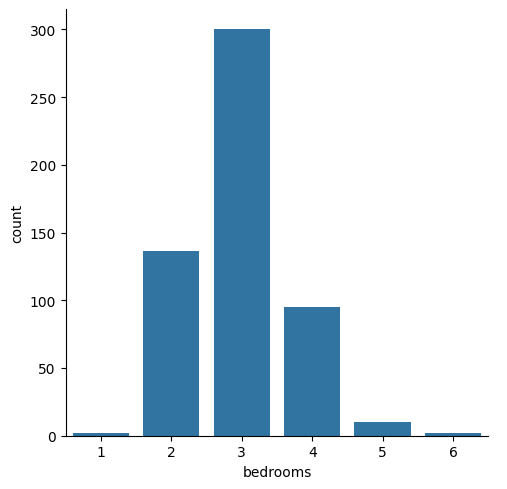

In [98]:
sns.catplot(
    data=house,
    x='bedrooms',
    kind='count'
)

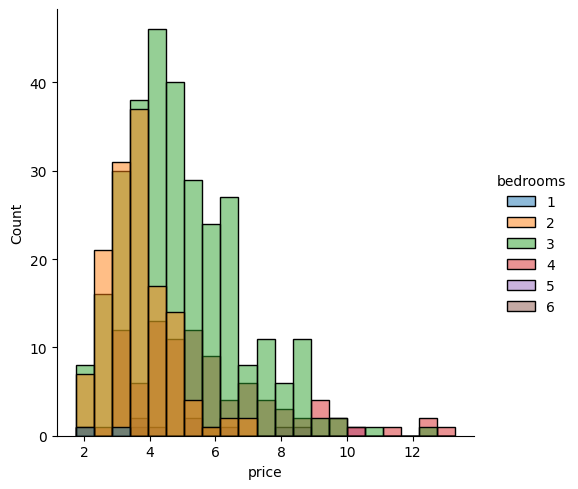

In [99]:
sns.displot(
    data=house,
    x='price',
    hue='bedrooms'
)

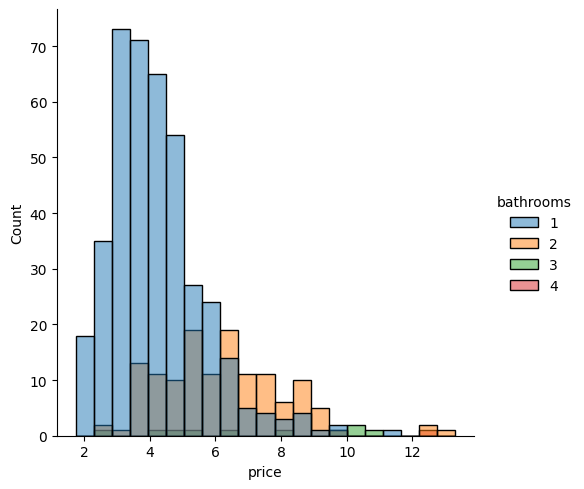

In [100]:
sns.displot(
    data=house,
    x='price',
    hue='bathrooms'
)

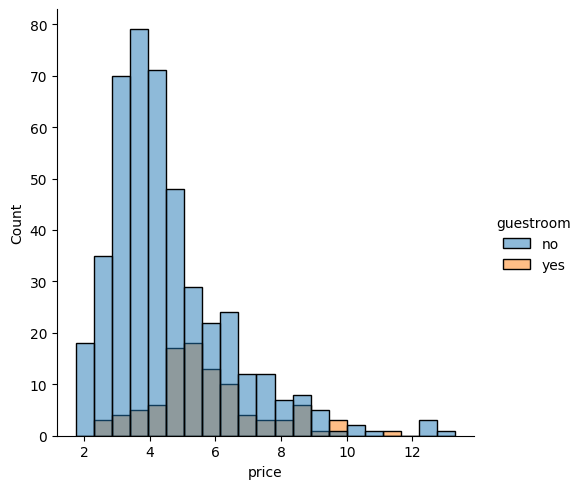

In [101]:
sns.displot(
    data=house,
    x='price',
    hue='guestroom'
)

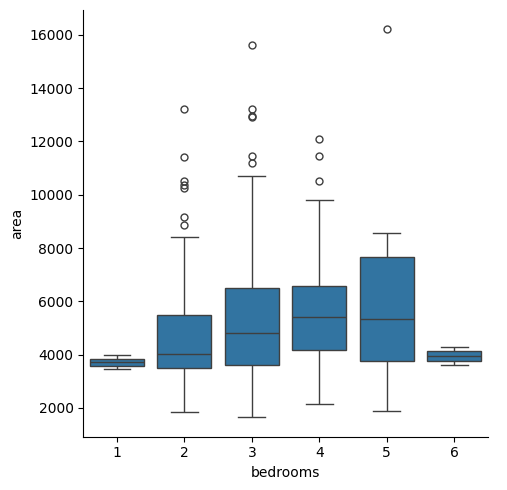

In [102]:
sns.catplot(
    data=house,
    x='bedrooms',
    y='area',
    kind='box'
)

The boxplot reveals an unusual observation: houses with 6 bedrooms tend to have surprisingly small areas. This anomaly suggests that these data points might be incorrect or misrecorded. To ensure more accurate analysis and visualization, it's reasonable to exclude houses with 6 bedrooms from the dataset.  
Additionally, note that there may be a disproportionately high number of houses with only 1 bedroom, which could also skew the distribution.

In [103]:
house[~house['bedrooms'].isin([6,1])]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13.30000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12.25000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12.25000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12.21500,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11.41000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1.76715,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1.75000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1.75000,2910,3,1,1,no,no,no,no,no,0,no,furnished


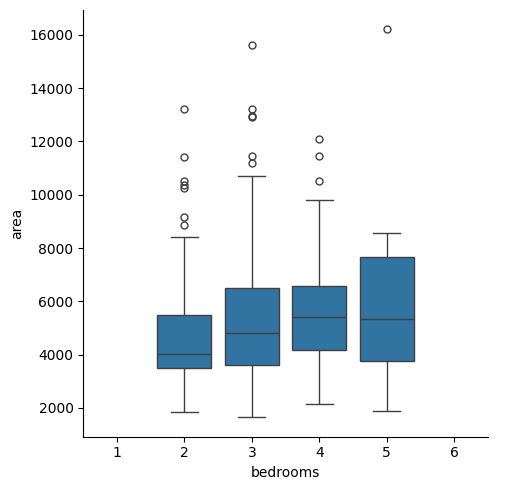

In [104]:
sns.catplot(
    data=house[~house['bedrooms'].isin([6,1])],
    x='bedrooms',
    y='area',
    kind='box'
)

Observations `with 1 and 6 bedrooms` showed little influence on the performance of our algorithm. As a result, excluding these four entries is unlikely to affect the outcomes of our analysis.

<Axes: xlabel='area', ylabel='price'>

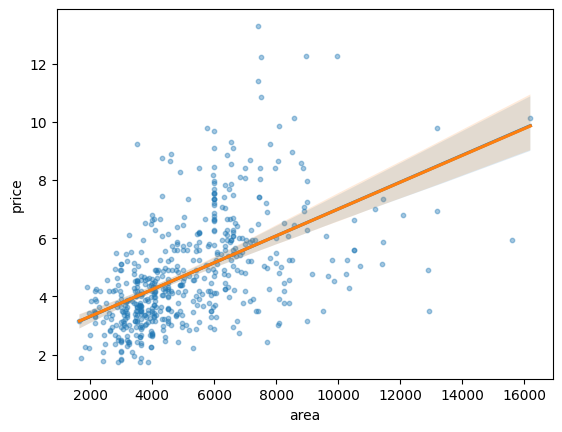

In [105]:
sns.regplot(
    data=house,
    x='area',
    y='price',
    scatter_kws={'alpha':0.4,'s':10}
)
sns.regplot(
    data=house[~house['bedrooms'].isin([6,1])],
    x='area',
    y='price',
    scatter=False
)

<Axes: xlabel='area', ylabel='price'>

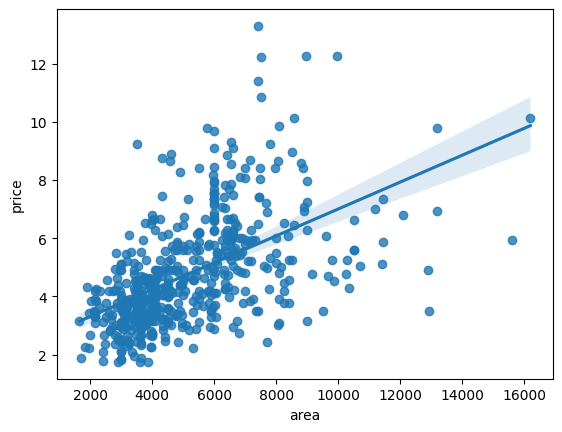

In [106]:
sns.regplot(
    data=house,
    x='area',
    y='price'
)

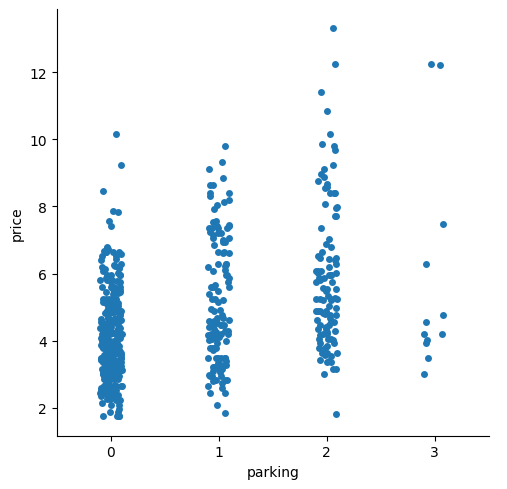

In [107]:
sns.catplot(
    data=house,
    x='parking',
    y='price',
    kind="strip"
)

In [108]:
for col in categorical_columns:
    house[col]=house[col].cat.codes

<Axes: >

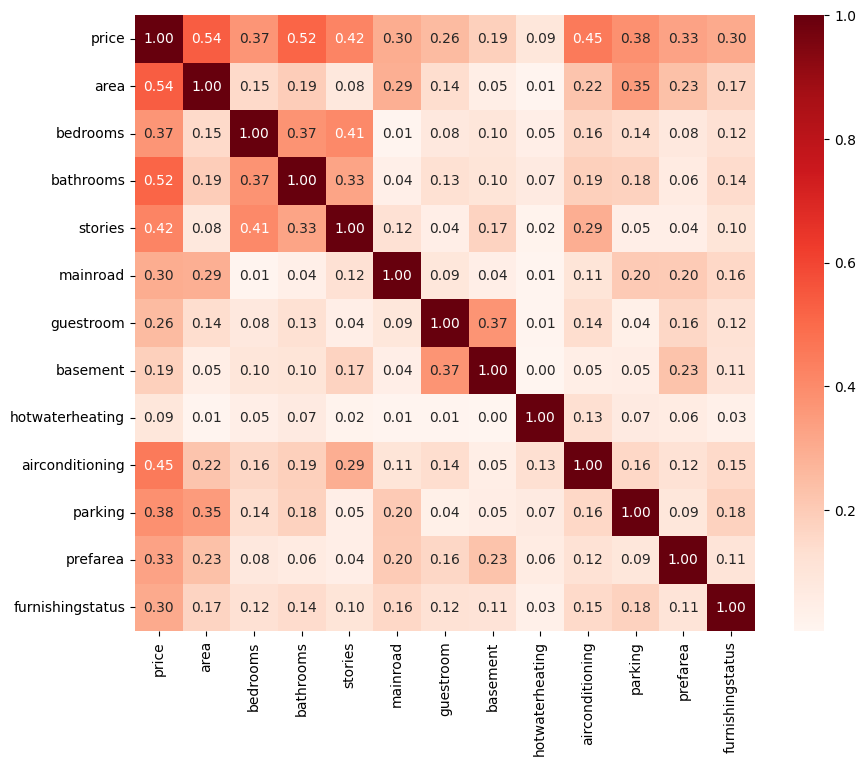

In [109]:
plt.figure(figsize=(10,8))
sns.heatmap(
    abs(house.corr()),
    annot=True,
    fmt='.2f',
    cmap='Reds'
)